# Tarea 2: Extracción de caracteristicas

Nombre: José Luis Cádiz Sejas

* Revisar diapositivas para repasar materia
* Agregar graficos de media y varianza de cada caracteristica
* Revisar mejor el codigo, adaptarlo y entenderlo
* Explicar en mayor detalle el codigo
* Ver el tema del tamaño de las ventanas acorde a las velocidades de giro
* Aplicarselo a derivada e integrales
* Concluir los mejores metodos 
* Entregar

In [1]:
# Librerias
import matplotlib.pyplot as plt
import scipy.io as sio
import pandas as pd
import numpy as np
import math
from numpy import mean, sqrt, square
from scipy.stats import kurtosis, skew
from scipy.fftpack import fft
from scipy import signal
import  pywt

In [2]:
# Lectura de datos
Datos0=sio.loadmat('H-C-1.mat') #Healthy
Datos1=sio.loadmat('I-C-1.mat') #Inner
Datos2=sio.loadmat('O-C-1.mat') #Outer
Datos3=sio.loadmat('B-C-1.mat') #Ball
Datos4=sio.loadmat('C-C-1.mat') #Combination
Normal=Datos0['Channel_1'][range(0,2000000,20),0]
Outer=Datos2['Channel_1'][range(0,2000000,20),0]
Inner=Datos1['Channel_1'][range(0,2000000,20),0]
Ball=Datos3['Channel_1'][range(0,2000000,20),0]
Combination=Datos4['Channel_1'][range(0,2000000,20),0]


In [30]:
# Frecuencia de muestreo
Fs=10*1000
dt=1/Fs #paso de tiempo
N=len(Normal)
t=np.linspace(0,dt*(N-2),N-1)

In [31]:
# Derivada
Normal_dev=Normal[1:N]-Normal[0:N-1]
Outer_dev=Outer[1:N]-Outer[0:N-1]
Inner_dev=Inner[1:N]-Inner[0:N-1]
Ball_dev=Ball[1:N]-Ball[0:N-1]
Combination_dev=Combination[1:N]-Combination[0:N-1]

In [32]:
# Integral
Normal_int=Normal[1:N]+Normal[0:N-1]
Outer_int=Outer[1:N]+Outer[0:N-1]
Inner_int=Inner[1:N]+Inner[0:N-1]
Ball_int=Ball[1:N]+Ball[0:N-1]
Combination_int=Combination[1:N]+Combination[0:N-1]

# Exploración Temporal

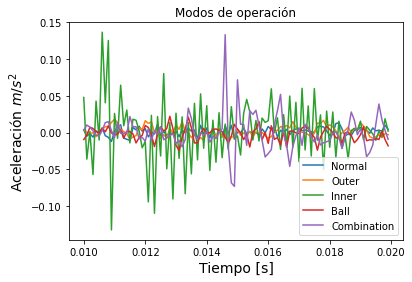

In [33]:
# Plot
plt.plot(t[100:200],Normal[100:200])

plt.plot(t[100:200],Outer[100:200])

plt.plot(t[100:200],Inner[100:200])

plt.plot(t[100:200],Ball[100:200])

plt.plot(t[100:200],Combination[100:200])

plt.xlabel('Tiempo [s]', fontsize=14)
plt.ylabel('Aceleración $m/s^2$', fontsize=14)
plt.legend(['Normal','Outer','Inner','Ball','Combination'])
plt.title('Modos de operación')

plt.show()

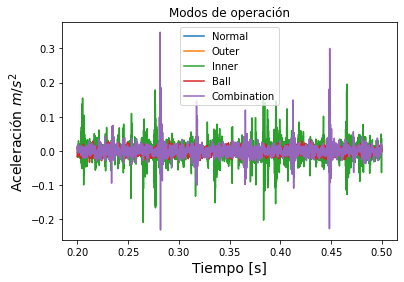

In [34]:
# Plot
plt.plot(t[2000:5000],Normal[2000:5000])

plt.plot(t[2000:5000],Outer[2000:5000])

plt.plot(t[2000:5000],Inner[2000:5000])

plt.plot(t[2000:5000],Ball[2000:5000])

plt.plot(t[2000:5000],Combination[2000:5000])

plt.xlabel('Tiempo [s]', fontsize=14)
plt.ylabel('Aceleración $m/s^2$', fontsize=14)
plt.legend(['Normal','Outer','Inner','Ball','Combination'])
plt.title('Modos de operación')

plt.show()

**A partir de los dos plot anteriores se observa que Combination e Inner resaltan claramente respecto a las demás señales, por lo que debería ser sencillo detectar este tipo de fallas.**

# Dominio en el tiempo

### Features a la señal original

In [37]:
#calcular parametros por tramos
N=len(Normal)
L=5000 #largo de los segmentos
l=1000 #overlap
Nt=math.floor((N-l)/(L-l)) #total de tramos


#inicializar matrices con parametros
Pn=np.zeros((Nt,8))
Po=np.zeros((Nt,8))
Pi=np.zeros((Nt,8))
Pb=np.zeros((Nt,8))
Pc=np.zeros((Nt,8))

for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Pn[i-1,0]=sqrt(mean(square(Normal[inicio:fin]))) #RMS
    Pn[i-1,1]=np.amax(Normal[inicio:fin]) #Peak
    Pn[i-1,2]=np.amax(Normal[inicio:fin])-np.amin(Normal[inicio:fin]) #peak-peak
    Pn[i-1,3]=Pn[i-1,1]/Pn[i-1,0] #crest
    Pn[i-1,4]=np.mean(Normal[inicio:fin]) #Media
    Pn[i-1,5]=np.var(Normal[inicio:fin]) #var
    Pn[i-1,6]=skew(Normal[inicio:fin]) #asimetria
    Pn[i-1,7]=kurtosis(Normal[inicio:fin]) #curtosis
    
    Po[i-1,0]=sqrt(mean(square(Outer[inicio:fin]))) #RMS
    Po[i-1,1]=np.amax(Outer[inicio:fin]) #Peak
    Po[i-1,2]=np.amax(Outer[inicio:fin])-np.amin(Outer[inicio:fin]) #peak-peak
    Po[i-1,3]=Po[i-1,1]/Po[i-1,0] #crest
    Po[i-1,4]=np.mean(Outer[inicio:fin]) #Media
    Po[i-1,5]=np.var(Outer[inicio:fin]) #var
    Po[i-1,6]=skew(Outer[inicio:fin]) #asimetria
    Po[i-1,7]=kurtosis(Outer[inicio:fin]) #curtosis
    
    Pi[i-1,0]=sqrt(mean(square(Inner[inicio:fin]))) #RMS
    Pi[i-1,1]=np.amax(Inner[inicio:fin]) #Peak
    Pi[i-1,2]=np.amax(Inner[inicio:fin])-np.amin(Inner[inicio:fin]) #peak-peak
    Pi[i-1,3]=Pi[i-1,1]/Pi[i-1,0] #crest
    Pi[i-1,4]=np.mean(Inner[inicio:fin]) #Media
    Pi[i-1,5]=np.var(Inner[inicio:fin]) #var
    Pi[i-1,6]=skew(Inner[inicio:fin]) #asimetria
    Pi[i-1,7]=kurtosis(Inner[inicio:fin]) #curtosis

    Pb[i-1,0]=sqrt(mean(square(Ball[inicio:fin]))) #RMS
    Pb[i-1,1]=np.amax(Ball[inicio:fin]) #Peak
    Pb[i-1,2]=np.amax(Ball[inicio:fin])-np.amin(Ball[inicio:fin]) #peak-peak
    Pb[i-1,3]=Pb[i-1,1]/Pb[i-1,0] #crest
    Pb[i-1,4]=np.mean(Ball[inicio:fin]) #Media
    Pb[i-1,5]=np.var(Ball[inicio:fin]) #var
    Pb[i-1,6]=skew(Ball[inicio:fin]) #asimetria
    Pb[i-1,7]=kurtosis(Ball[inicio:fin]) #curtosis

    Pc[i-1,0]=sqrt(mean(square(Combination[inicio:fin]))) #RMS
    Pc[i-1,1]=np.amax(Combination[inicio:fin]) #Peak
    Pc[i-1,2]=np.amax(Combination[inicio:fin])-np.amin(Combination[inicio:fin]) #peak-peak
    Pc[i-1,3]=Pc[i-1,1]/Pc[i-1,0] #crest
    Pc[i-1,4]=np.mean(Combination[inicio:fin]) #Media
    Pc[i-1,5]=np.var(Combination[inicio:fin]) #var
    Pc[i-1,6]=skew(Combination[inicio:fin]) #asimetria
    Pc[i-1,7]=kurtosis(Combination[inicio:fin]) #curtosis

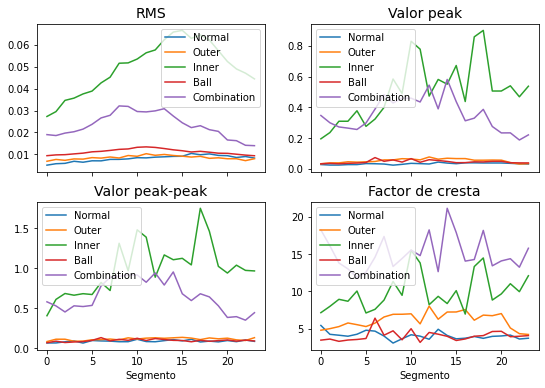

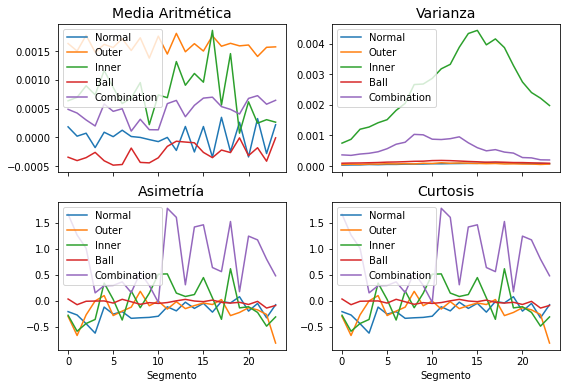

In [39]:
#graficar datos
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax1.plot(Pn[:,0])
ax1.plot(Po[:,0])
ax1.plot(Pi[:,0])
ax1.plot(Pb[:,0])
ax1.plot(Pc[:,0])
ax1.legend(['Normal','Outer','Inner','Ball','Combination'])
ax1.set_title('RMS', fontsize=14)

ax2.plot(Pn[:,1])
ax2.plot(Po[:,1])
ax2.plot(Pi[:,1])
ax2.plot(Pb[:,1])
ax2.plot(Pc[:,1])
ax2.legend(['Normal','Outer','Inner','Ball','Combination'])
ax2.set_title('Valor peak', fontsize=14)

ax3.plot(Pn[:,2])
ax3.plot(Po[:,2])
ax3.plot(Pi[:,2])
ax3.plot(Pb[:,2])
ax3.plot(Pc[:,2])
ax3.legend(['Normal','Outer','Inner','Ball','Combination'])
ax3.set(xlabel='Segmento')
ax3.set_title('Valor peak-peak', fontsize=14)

ax4.plot(Pn[:,3])
ax4.plot(Po[:,3])
ax4.plot(Pi[:,3])
ax4.plot(Pb[:,3])
ax4.plot(Pc[:,3])
ax4.legend(['Normal','Outer','Inner','Ball','Combination'])
ax4.set(xlabel='Segmento')
ax4.set_title('Factor de cresta', fontsize=14)

f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(Pn[:,4])
ax5.plot(Po[:,4])
ax5.plot(Pi[:,4])
ax5.plot(Pb[:,4])
ax5.plot(Pc[:,4])
ax5.legend(['Normal','Outer','Inner','Ball','Combination'])
ax5.set_title('Media Aritmética', fontsize=14)

ax6.plot(Pn[:,5])
ax6.plot(Po[:,5])
ax6.plot(Pi[:,5])
ax6.plot(Pb[:,5])
ax6.plot(Pc[:,5])
ax6.legend(['Normal','Outer','Inner','Ball','Combination'])
ax6.set_title('Varianza', fontsize=14)

ax7.plot(Pn[:,6])
ax7.plot(Po[:,6])
ax7.plot(Pi[:,6])
ax7.plot(Pb[:,6])
ax7.plot(Pc[:,6])
ax7.legend(['Normal','Outer','Inner','Ball','Combination'])
ax7.set(xlabel='Segmento')
ax7.set_title('Asimetría', fontsize=14)

ax8.plot(Pn[:,6])
ax8.plot(Po[:,6])
ax8.plot(Pi[:,6])
ax8.plot(Pb[:,6])
ax8.plot(Pc[:,6])
ax8.legend(['Normal','Outer','Inner','Ball','Combination'])
ax8.set(xlabel='Segmento')
ax8.set_title('Curtosis', fontsize=14)
plt.show()

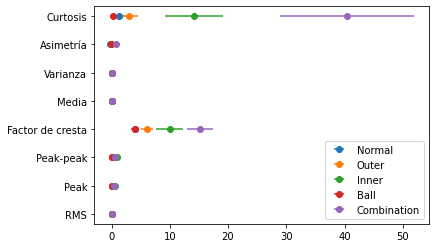

In [40]:
#etiquetas eje y
titulosy=['RMS','Peak','Peak-peak','Factor de cresta','Media','Varianza','Asimetría','Curtosis']

       
plt.figure()        
plt.errorbar(Pn.mean(axis=0), np.arange(8),xerr=Pn.std(axis=0) , fmt='o')
plt.errorbar(Po.mean(axis=0), np.arange(8),xerr=Po.std(axis=0) , fmt='o')
plt.errorbar(Pi.mean(axis=0), np.arange(8),xerr=Pi.std(axis=0) , fmt='o')
plt.errorbar(Pb.mean(axis=0), np.arange(8),xerr=Pb.std(axis=0) , fmt='o')
plt.errorbar(Pc.mean(axis=0), np.arange(8),xerr=Pc.std(axis=0) , fmt='o')
plt.yticks(np.arange(8),titulosy)
plt.legend(('Normal','Outer','Inner','Ball','Combination'))
plt.show() 

### Features a la señal derivada

In [41]:
#calcular parametros por tramos
N=len(Normal_dev)
L=5000 #largo de los segmentos
l=1000 #overlap
Nt=math.floor((N-l)/(L-l)) #total de tramos


#inicializar matrices con parametros
Pn_dev=np.zeros((Nt,8))
Po_dev=np.zeros((Nt,8))
Pi_dev=np.zeros((Nt,8))
Pb_dev=np.zeros((Nt,8))
Pc_dev=np.zeros((Nt,8))

for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Pn_dev[i-1,0]=sqrt(mean(square(Normal_dev[inicio:fin]))) #RMS
    Pn_dev[i-1,1]=np.amax(Normal_dev[inicio:fin]) #Peak
    Pn_dev[i-1,2]=np.amax(Normal_dev[inicio:fin])-np.amin(Normal_dev[inicio:fin]) #peak-peak
    Pn_dev[i-1,3]=Pn_dev[i-1,1]/Pn_dev[i-1,0] #crest
    Pn_dev[i-1,4]=np.mean(Normal_dev[inicio:fin]) #Media
    Pn_dev[i-1,5]=np.var(Normal_dev[inicio:fin]) #var
    Pn_dev[i-1,6]=skew(Normal_dev[inicio:fin]) #asimetria
    Pn_dev[i-1,7]=kurtosis(Normal_dev[inicio:fin]) #curtosis
    
    Po_dev[i-1,0]=sqrt(mean(square(Outer_dev[inicio:fin]))) #RMS
    Po_dev[i-1,1]=np.amax(Outer_dev[inicio:fin]) #Peak
    Po_dev[i-1,2]=np.amax(Outer_dev[inicio:fin])-np.amin(Outer_dev[inicio:fin]) #peak-peak
    Po_dev[i-1,3]=Po_dev[i-1,1]/Po_dev[i-1,0] #crest
    Po_dev[i-1,4]=np.mean(Outer_dev[inicio:fin]) #Media
    Po_dev[i-1,5]=np.var(Outer_dev[inicio:fin]) #var
    Po_dev[i-1,6]=skew(Outer_dev[inicio:fin]) #asimetria
    Po_dev[i-1,7]=kurtosis(Outer_dev[inicio:fin]) #curtosis
    
    Pi_dev[i-1,0]=sqrt(mean(square(Inner_dev[inicio:fin]))) #RMS
    Pi_dev[i-1,1]=np.amax(Inner_dev[inicio:fin]) #Peak
    Pi_dev[i-1,2]=np.amax(Inner_dev[inicio:fin])-np.amin(Inner_dev[inicio:fin]) #peak-peak
    Pi_dev[i-1,3]=Pi_dev[i-1,1]/Pi_dev[i-1,0] #crest
    Pi_dev[i-1,4]=np.mean(Inner_dev[inicio:fin]) #Media
    Pi_dev[i-1,5]=np.var(Inner_dev[inicio:fin]) #var
    Pi_dev[i-1,6]=skew(Inner_dev[inicio:fin]) #asimetria
    Pi_dev[i-1,7]=kurtosis(Inner_dev[inicio:fin]) #curtosis

    Pb_dev[i-1,0]=sqrt(mean(square(Ball_dev[inicio:fin]))) #RMS
    Pb_dev[i-1,1]=np.amax(Ball_dev[inicio:fin]) #Peak
    Pb_dev[i-1,2]=np.amax(Ball_dev[inicio:fin])-np.amin(Ball_dev[inicio:fin]) #peak-peak
    Pb_dev[i-1,3]=Pb_dev[i-1,1]/Pb_dev[i-1,0] #crest
    Pb_dev[i-1,4]=np.mean(Ball_dev[inicio:fin]) #Media
    Pb_dev[i-1,5]=np.var(Ball_dev[inicio:fin]) #var
    Pb_dev[i-1,6]=skew(Ball_dev[inicio:fin]) #asimetria
    Pb_dev[i-1,7]=kurtosis(Ball_dev[inicio:fin]) #curtosis

    Pc_dev[i-1,0]=sqrt(mean(square(Combination_dev[inicio:fin]))) #RMS
    Pc_dev[i-1,1]=np.amax(Combination_dev[inicio:fin]) #Peak
    Pc_dev[i-1,2]=np.amax(Combination_dev[inicio:fin])-np.amin(Combination_dev[inicio:fin]) #peak-peak
    Pc_dev[i-1,3]=Pc_dev[i-1,1]/Pc_dev[i-1,0] #crest
    Pc_dev[i-1,4]=np.mean(Combination_dev[inicio:fin]) #Media
    Pc_dev[i-1,5]=np.var(Combination_dev[inicio:fin]) #var
    Pc_dev[i-1,6]=skew(Combination_dev[inicio:fin]) #asimetria
    Pc_dev[i-1,7]=kurtosis(Combination_dev[inicio:fin]) #curtosis

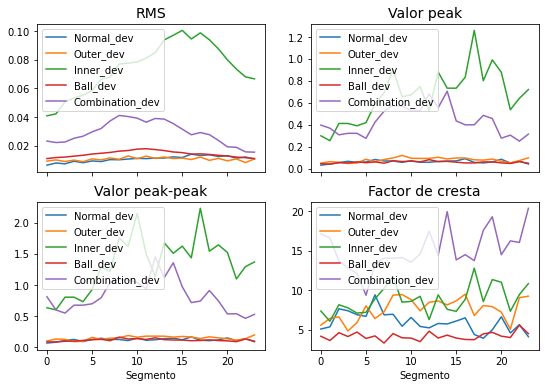

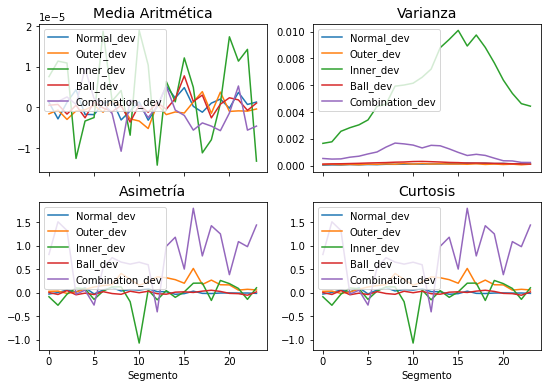

In [42]:
#graficar datos
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax1.plot(Pn_dev[:,0])
ax1.plot(Po_dev[:,0])
ax1.plot(Pi_dev[:,0])
ax1.plot(Pb_dev[:,0])
ax1.plot(Pc_dev[:,0])
ax1.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax1.set_title('RMS', fontsize=14)

ax2.plot(Pn_dev[:,1])
ax2.plot(Po_dev[:,1])
ax2.plot(Pi_dev[:,1])
ax2.plot(Pb_dev[:,1])
ax2.plot(Pc_dev[:,1])
ax2.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax2.set_title('Valor peak', fontsize=14)

ax3.plot(Pn_dev[:,2])
ax3.plot(Po_dev[:,2])
ax3.plot(Pi_dev[:,2])
ax3.plot(Pb_dev[:,2])
ax3.plot(Pc_dev[:,2])
ax3.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax3.set(xlabel='Segmento')
ax3.set_title('Valor peak-peak', fontsize=14)

ax4.plot(Pn_dev[:,3])
ax4.plot(Po_dev[:,3])
ax4.plot(Pi_dev[:,3])
ax4.plot(Pb_dev[:,3])
ax4.plot(Pc_dev[:,3])
ax4.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax4.set(xlabel='Segmento')
ax4.set_title('Factor de cresta', fontsize=14)

f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(Pn_dev[:,4])
ax5.plot(Po_dev[:,4])
ax5.plot(Pi_dev[:,4])
ax5.plot(Pb_dev[:,4])
ax5.plot(Pc_dev[:,4])
ax5.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax5.set_title('Media Aritmética', fontsize=14)

ax6.plot(Pn_dev[:,5])
ax6.plot(Po_dev[:,5])
ax6.plot(Pi_dev[:,5])
ax6.plot(Pb_dev[:,5])
ax6.plot(Pc_dev[:,5])
ax6.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax6.set_title('Varianza', fontsize=14)

ax7.plot(Pn_dev[:,6])
ax7.plot(Po_dev[:,6])
ax7.plot(Pi_dev[:,6])
ax7.plot(Pb_dev[:,6])
ax7.plot(Pc_dev[:,6])
ax7.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax7.set(xlabel='Segmento')
ax7.set_title('Asimetría', fontsize=14)

ax8.plot(Pn_dev[:,6])
ax8.plot(Po_dev[:,6])
ax8.plot(Pi_dev[:,6])
ax8.plot(Pb_dev[:,6])
ax8.plot(Pc_dev[:,6])
ax8.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax8.set(xlabel='Segmento')
ax8.set_title('Curtosis', fontsize=14)
plt.show()

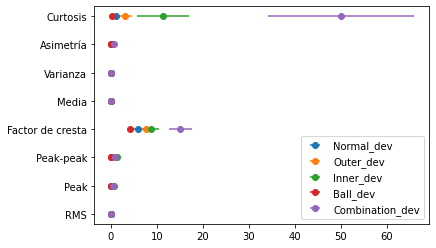

In [43]:
#etiquetas eje y
titulosy=['RMS','Peak','Peak-peak','Factor de cresta','Media','Varianza','Asimetría','Curtosis']

       
plt.figure()        
plt.errorbar(Pn_dev.mean(axis=0), np.arange(8),xerr=Pn_dev.std(axis=0) , fmt='o')
plt.errorbar(Po_dev.mean(axis=0), np.arange(8),xerr=Po_dev.std(axis=0) , fmt='o')
plt.errorbar(Pi_dev.mean(axis=0), np.arange(8),xerr=Pi_dev.std(axis=0) , fmt='o')
plt.errorbar(Pb_dev.mean(axis=0), np.arange(8),xerr=Pb_dev.std(axis=0) , fmt='o')
plt.errorbar(Pc_dev.mean(axis=0), np.arange(8),xerr=Pc_dev.std(axis=0) , fmt='o')
plt.yticks(np.arange(8),titulosy)
plt.legend(('Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'))
plt.show() 

### Features a la señal integrada

In [44]:
#calcular parametros por tramos
N=len(Normal_int)
L=5000 #largo de los segmentos
l=1000 #overlap
Nt=math.floor((N-l)/(L-l)) #total de tramos


#inicializar matrices con parametros
Pn_int=np.zeros((Nt,8))
Po_int=np.zeros((Nt,8))
Pi_int=np.zeros((Nt,8))
Pb_int=np.zeros((Nt,8))
Pc_int=np.zeros((Nt,8))

for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Pn_int[i-1,0]=sqrt(mean(square(Normal_int[inicio:fin]))) #RMS
    Pn_int[i-1,1]=np.amax(Normal_int[inicio:fin]) #Peak
    Pn_int[i-1,2]=np.amax(Normal_int[inicio:fin])-np.amin(Normal_int[inicio:fin]) #peak-peak
    Pn_int[i-1,3]=Pn_int[i-1,1]/Pn_int[i-1,0] #crest
    Pn_int[i-1,4]=np.mean(Normal_int[inicio:fin]) #Media
    Pn_int[i-1,5]=np.var(Normal_int[inicio:fin]) #var
    Pn_int[i-1,6]=skew(Normal_int[inicio:fin]) #asimetria
    Pn_int[i-1,7]=kurtosis(Normal_int[inicio:fin]) #curtosis
    
    Po_int[i-1,0]=sqrt(mean(square(Outer_int[inicio:fin]))) #RMS
    Po_int[i-1,1]=np.amax(Outer_int[inicio:fin]) #Peak
    Po_int[i-1,2]=np.amax(Outer_int[inicio:fin])-np.amin(Outer_int[inicio:fin]) #peak-peak
    Po_int[i-1,3]=Po_int[i-1,1]/Po_int[i-1,0] #crest
    Po_int[i-1,4]=np.mean(Outer_int[inicio:fin]) #Media
    Po_int[i-1,5]=np.var(Outer_int[inicio:fin]) #var
    Po_int[i-1,6]=skew(Outer_int[inicio:fin]) #asimetria
    Po_int[i-1,7]=kurtosis(Outer_int[inicio:fin]) #curtosis
    
    Pi_int[i-1,0]=sqrt(mean(square(Inner_int[inicio:fin]))) #RMS
    Pi_int[i-1,1]=np.amax(Inner_int[inicio:fin]) #Peak
    Pi_int[i-1,2]=np.amax(Inner_int[inicio:fin])-np.amin(Inner_int[inicio:fin]) #peak-peak
    Pi_int[i-1,3]=Pi_int[i-1,1]/Pi_int[i-1,0] #crest
    Pi_int[i-1,4]=np.mean(Inner_int[inicio:fin]) #Media
    Pi_int[i-1,5]=np.var(Inner_int[inicio:fin]) #var
    Pi_int[i-1,6]=skew(Inner_int[inicio:fin]) #asimetria
    Pi_int[i-1,7]=kurtosis(Inner_int[inicio:fin]) #curtosis

    Pb_int[i-1,0]=sqrt(mean(square(Ball_int[inicio:fin]))) #RMS
    Pb_int[i-1,1]=np.amax(Ball_int[inicio:fin]) #Peak
    Pb_int[i-1,2]=np.amax(Ball_int[inicio:fin])-np.amin(Ball_int[inicio:fin]) #peak-peak
    Pb_int[i-1,3]=Pb_int[i-1,1]/Pb_int[i-1,0] #crest
    Pb_int[i-1,4]=np.mean(Ball_int[inicio:fin]) #Media
    Pb_int[i-1,5]=np.var(Ball_int[inicio:fin]) #var
    Pb_int[i-1,6]=skew(Ball_int[inicio:fin]) #asimetria
    Pb_int[i-1,7]=kurtosis(Ball_int[inicio:fin]) #curtosis

    Pc_int[i-1,0]=sqrt(mean(square(Combination_int[inicio:fin]))) #RMS
    Pc_int[i-1,1]=np.amax(Combination_int[inicio:fin]) #Peak
    Pc_int[i-1,2]=np.amax(Combination_int[inicio:fin])-np.amin(Combination_int[inicio:fin]) #peak-peak
    Pc_int[i-1,3]=Pc_int[i-1,1]/Pc_int[i-1,0] #crest
    Pc_int[i-1,4]=np.mean(Combination_int[inicio:fin]) #Media
    Pc_int[i-1,5]=np.var(Combination_int[inicio:fin]) #var
    Pc_int[i-1,6]=skew(Combination_int[inicio:fin]) #asimetria
    Pc_int[i-1,7]=kurtosis(Combination_int[inicio:fin]) #curtosis

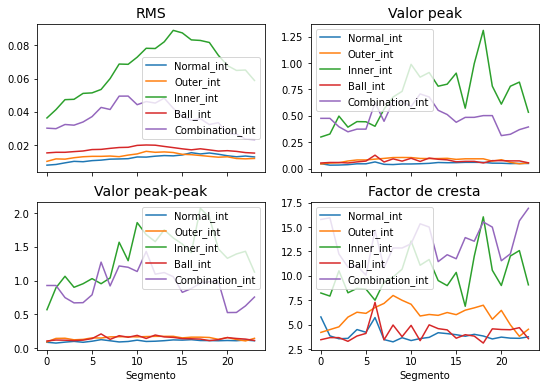

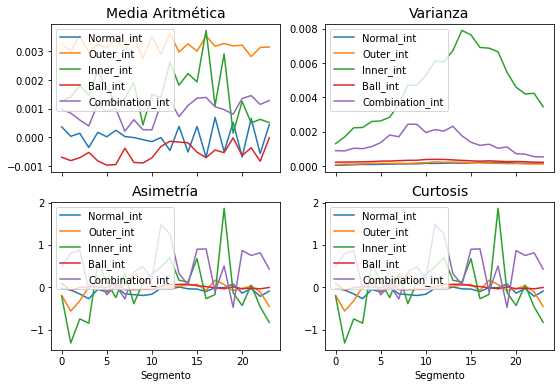

In [45]:
#graficar datos
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax1.plot(Pn_int[:,0])
ax1.plot(Po_int[:,0])
ax1.plot(Pi_int[:,0])
ax1.plot(Pb_int[:,0])
ax1.plot(Pc_int[:,0])
ax1.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax1.set_title('RMS', fontsize=14)

ax2.plot(Pn_int[:,1])
ax2.plot(Po_int[:,1])
ax2.plot(Pi_int[:,1])
ax2.plot(Pb_int[:,1])
ax2.plot(Pc_int[:,1])
ax2.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax2.set_title('Valor peak', fontsize=14)

ax3.plot(Pn_int[:,2])
ax3.plot(Po_int[:,2])
ax3.plot(Pi_int[:,2])
ax3.plot(Pb_int[:,2])
ax3.plot(Pc_int[:,2])
ax3.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax3.set(xlabel='Segmento')
ax3.set_title('Valor peak-peak', fontsize=14)

ax4.plot(Pn_int[:,3])
ax4.plot(Po_int[:,3])
ax4.plot(Pi_int[:,3])
ax4.plot(Pb_int[:,3])
ax4.plot(Pc_int[:,3])
ax4.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax4.set(xlabel='Segmento')
ax4.set_title('Factor de cresta', fontsize=14)

f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(Pn_int[:,4])
ax5.plot(Po_int[:,4])
ax5.plot(Pi_int[:,4])
ax5.plot(Pb_int[:,4])
ax5.plot(Pc_int[:,4])
ax5.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax5.set_title('Media Aritmética', fontsize=14)

ax6.plot(Pn_int[:,5])
ax6.plot(Po_int[:,5])
ax6.plot(Pi_int[:,5])
ax6.plot(Pb_int[:,5])
ax6.plot(Pc_int[:,5])
ax6.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax6.set_title('Varianza', fontsize=14)

ax7.plot(Pn_int[:,6])
ax7.plot(Po_int[:,6])
ax7.plot(Pi_int[:,6])
ax7.plot(Pb_int[:,6])
ax7.plot(Pc_int[:,6])
ax7.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax7.set(xlabel='Segmento')
ax7.set_title('Asimetría', fontsize=14)

ax8.plot(Pn_int[:,6])
ax8.plot(Po_int[:,6])
ax8.plot(Pi_int[:,6])
ax8.plot(Pb_int[:,6])
ax8.plot(Pc_int[:,6])
ax8.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax8.set(xlabel='Segmento')
ax8.set_title('Curtosis', fontsize=14)
plt.show()

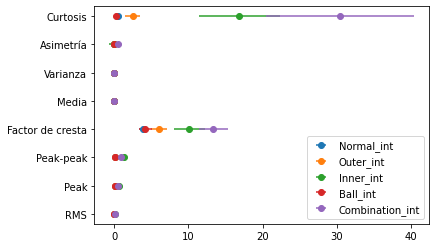

In [46]:
#etiquetas eje y
titulosy=['RMS','Peak','Peak-peak','Factor de cresta','Media','Varianza','Asimetría','Curtosis']

       
plt.figure()        
plt.errorbar(Pn_int.mean(axis=0), np.arange(8),xerr=Pn_int.std(axis=0) , fmt='o')
plt.errorbar(Po_int.mean(axis=0), np.arange(8),xerr=Po_int.std(axis=0) , fmt='o')
plt.errorbar(Pi_int.mean(axis=0), np.arange(8),xerr=Pi_int.std(axis=0) , fmt='o')
plt.errorbar(Pb_int.mean(axis=0), np.arange(8),xerr=Pb_int.std(axis=0) , fmt='o')
plt.errorbar(Pc_int.mean(axis=0), np.arange(8),xerr=Pc_int.std(axis=0) , fmt='o')
plt.yticks(np.arange(8),titulosy)
plt.legend(('Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'))
plt.show() 

#### Comentarios

**A partir de la extracción de carácteristicas de la señal original, derivada e integral se observa que las features que contribuyen a la detección de la falla son:**

* Señal original: Curtosis y Factor de Cresta.
* Señal derivada: La separación del caso normal se logra separar más aun con Curtosis y Factor de Cresta.
* Señal integrada: Curtosis y Factor de Cresta destacan, pero no hay una mejora respecto de la señal original.

# Dominio de la frecuencia

### Señal original

In [50]:
Fmax=4000 #frecuencia máxima -> debe ser menor o igual a Fs/2
L=5000 #largo de los segmentos
l=1000 #overlap
nb=10 #numero de bandas

dt=1/Fs #paso de tiempo
df=Fs/L
Nf=int(Fmax/df) #numero de líneas en los espectros
N=len(Normal) #numero de datos
Nt=math.floor((N-l)/(L-l)) #total de segmentos

En=np.zeros((Nt,nb))
Eo=np.zeros((Nt,nb))
Ei=np.zeros((Nt,nb))
Eb=np.zeros((Nt,nb))
Ec=np.zeros((Nt,nb))

for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Fn = fft(Normal[inicio:fin])[0:Nf]/(L/2)
    Fo = fft(Outer[inicio:fin])[0:Nf]/(L/2)
    Fi = fft(Inner[inicio:fin])[0:Nf]/(L/2)
    Fb = fft(Ball[inicio:fin])[0:Nf]/(L/2)
    Fc = fft(Combination[inicio:fin])[0:Nf]/(L/2)
    
    Lb=int(Nf/nb)
    for k in range(1,nb+1):
        inicio=Lb*(k-1)+1
        fin=k*Lb
        En[i-1][k-1]=np.mean(abs(Fn[inicio:fin]))
        Eo[i-1][k-1]=np.mean(abs(Fo[inicio:fin]))
        Ei[i-1][k-1]=np.mean(abs(Fi[inicio:fin]))
        Eb[i-1][k-1]=np.mean(abs(Fb[inicio:fin]))
        Ec[i-1][k-1]=np.mean(abs(Fc[inicio:fin]))

Text(0.5, 1.0, 'Banda 8')

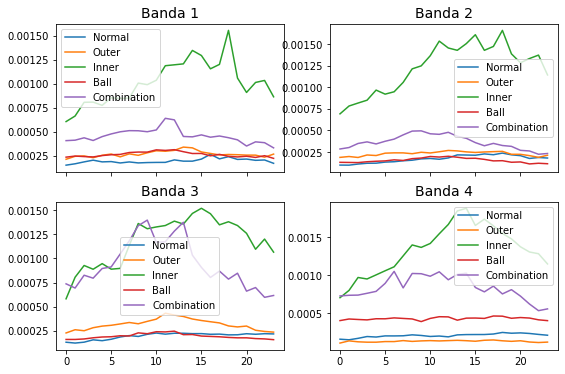

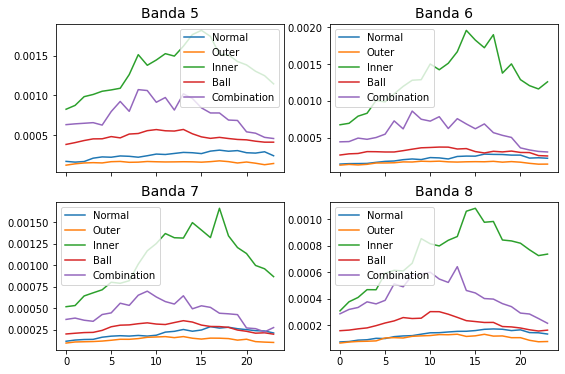

In [51]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))

ax1.plot(En[:,0])
ax1.plot(Eo[:,0])
ax1.plot(Ei[:,0])
ax1.plot(Eb[:,0])
ax1.plot(Ec[:,0])
ax1.legend(['Normal','Outer','Inner','Ball','Combination'])
ax1.set_title('Banda 1', fontsize=14)

ax2.plot(En[:,1])
ax2.plot(Eo[:,1])
ax2.plot(Ei[:,1])
ax2.plot(Eb[:,1])
ax2.plot(Ec[:,1])
ax2.legend(['Normal','Outer','Inner','Ball','Combination'])
ax2.set_title('Banda 2', fontsize=14)

ax3.plot(En[:,2])
ax3.plot(Eo[:,2])
ax3.plot(Ei[:,2])
ax3.plot(Eb[:,2])
ax3.plot(Ec[:,2])
ax3.legend(['Normal','Outer','Inner','Ball','Combination'])
ax3.set_title('Banda 3', fontsize=14)

ax4.plot(En[:,3])
ax4.plot(Eo[:,3])
ax4.plot(Ei[:,3])
ax4.plot(Eb[:,3])
ax4.plot(Ec[:,3])
ax4.legend(['Normal','Outer','Inner','Ball','Combination'])
ax4.set_title('Banda 4', fontsize=14)

f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(En[:,4])
ax5.plot(Eo[:,4])
ax5.plot(Ei[:,4])
ax5.plot(Eb[:,4])
ax5.plot(Ec[:,4])
ax5.legend(['Normal','Outer','Inner','Ball','Combination'])
ax5.set_title('Banda 5', fontsize=14)

ax6.plot(En[:,5])
ax6.plot(Eo[:,5])
ax6.plot(Ei[:,5])
ax6.plot(Eb[:,5])
ax6.plot(Ec[:,5])
ax6.legend(['Normal','Outer','Inner','Ball','Combination'])
ax6.set_title('Banda 6', fontsize=14)

ax7.plot(En[:,6])
ax7.plot(Eo[:,6])
ax7.plot(Ei[:,6])
ax7.plot(Eb[:,6])
ax7.plot(Ec[:,6])
ax7.legend(['Normal','Outer','Inner','Ball','Combination'])
ax7.set_title('Banda 7', fontsize=14)

ax8.plot(En[:,7])
ax8.plot(Eo[:,7])
ax8.plot(Ei[:,7])
ax8.plot(Eb[:,7])
ax8.plot(Ec[:,7])
ax8.legend(['Normal','Outer','Inner','Ball','Combination'])
ax8.set_title('Banda 8', fontsize=14)

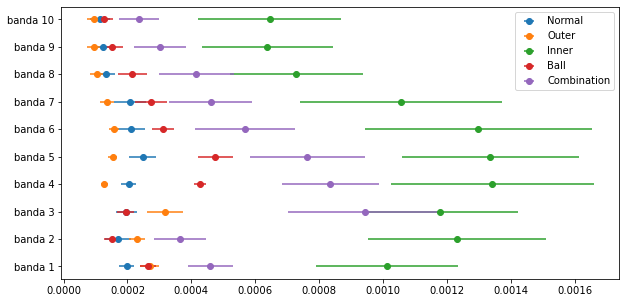

In [52]:
#etiquetas eje y
titulosy=['banda 1']
for i in range(2,nb+1):
    titulosy.append('banda ' + str(i))

plt.rcParams["figure.figsize"] = (10,5)       
plt.figure()        
plt.errorbar(En.mean(axis=0), np.arange(nb),xerr=En.std(axis=0) , fmt='o')
plt.errorbar(Eo.mean(axis=0), np.arange(nb),xerr=Eo.std(axis=0) , fmt='o')
plt.errorbar(Ei.mean(axis=0), np.arange(nb),xerr=Ei.std(axis=0) , fmt='o')
plt.errorbar(Eb.mean(axis=0), np.arange(nb),xerr=Eb.std(axis=0) , fmt='o')
plt.errorbar(Ec.mean(axis=0), np.arange(nb),xerr=Ec.std(axis=0) , fmt='o')
plt.yticks(np.arange(nb),titulosy)
plt.legend(('Normal','Outer','Inner','Ball','Combination'))
plt.show() 

### Señal derivada

In [53]:
Fmax=4000 #frecuencia máxima -> debe ser menor o igual a Fs/2
L=5000 #largo de los segmentos
l=1000 #overlap
nb=10 #numero de bandas

dt=1/Fs #paso de tiempo
df=Fs/L
Nf=int(Fmax/df) #numero de líneas en los espectros
N=len(Normal_dev) #numero de datos
Nt=math.floor((N-l)/(L-l)) #total de segmentos

En_dev=np.zeros((Nt,nb))
Eo_dev=np.zeros((Nt,nb))
Ei_dev=np.zeros((Nt,nb))
Eb_dev=np.zeros((Nt,nb))
Ec_dev=np.zeros((Nt,nb))

for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Fn_dev = fft(Normal_dev[inicio:fin])[0:Nf]/(L/2)
    Fo_dev = fft(Outer_dev[inicio:fin])[0:Nf]/(L/2)
    Fi_dev = fft(Inner_dev[inicio:fin])[0:Nf]/(L/2)
    Fb_dev = fft(Ball_dev[inicio:fin])[0:Nf]/(L/2)
    Fc_dev = fft(Combination_dev[inicio:fin])[0:Nf]/(L/2)
    
    Lb=int(Nf/nb)
    for k in range(1,nb+1):
        inicio=Lb*(k-1)+1
        fin=k*Lb
        En_dev[i-1][k-1]=np.mean(abs(Fn_dev[inicio:fin]))
        Eo_dev[i-1][k-1]=np.mean(abs(Fo_dev[inicio:fin]))
        Ei_dev[i-1][k-1]=np.mean(abs(Fi_dev[inicio:fin]))
        Eb_dev[i-1][k-1]=np.mean(abs(Fb_dev[inicio:fin]))
        Ec_dev[i-1][k-1]=np.mean(abs(Fc_dev[inicio:fin]))

Text(0.5, 1.0, 'Banda 8')

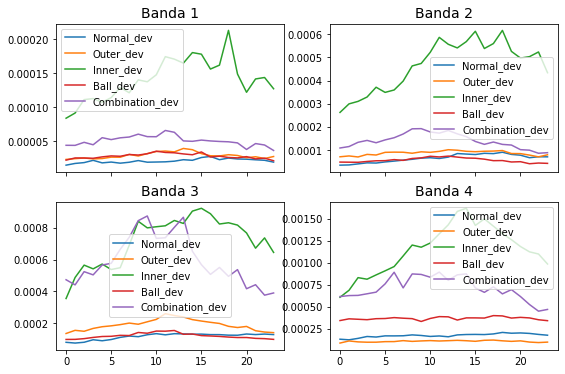

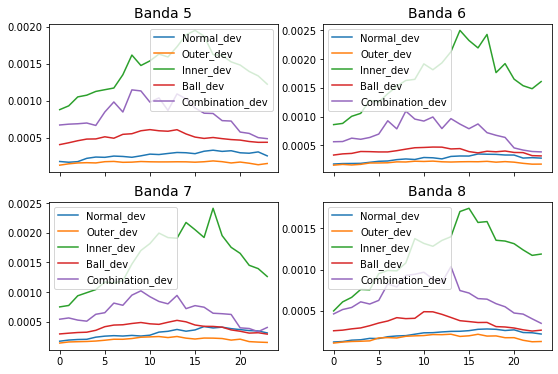

In [54]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))

ax1.plot(En_dev[:,0])
ax1.plot(Eo_dev[:,0])
ax1.plot(Ei_dev[:,0])
ax1.plot(Eb_dev[:,0])
ax1.plot(Ec_dev[:,0])
ax1.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax1.set_title('Banda 1', fontsize=14)

ax2.plot(En_dev[:,1])
ax2.plot(Eo_dev[:,1])
ax2.plot(Ei_dev[:,1])
ax2.plot(Eb_dev[:,1])
ax2.plot(Ec_dev[:,1])
ax2.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax2.set_title('Banda 2', fontsize=14)

ax3.plot(En_dev[:,2])
ax3.plot(Eo_dev[:,2])
ax3.plot(Ei_dev[:,2])
ax3.plot(Eb_dev[:,2])
ax3.plot(Ec_dev[:,2])
ax3.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax3.set_title('Banda 3', fontsize=14)

ax4.plot(En_dev[:,3])
ax4.plot(Eo_dev[:,3])
ax4.plot(Ei_dev[:,3])
ax4.plot(Eb_dev[:,3])
ax4.plot(Ec_dev[:,3])
ax4.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax4.set_title('Banda 4', fontsize=14)

f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(En_dev[:,4])
ax5.plot(Eo_dev[:,4])
ax5.plot(Ei_dev[:,4])
ax5.plot(Eb_dev[:,4])
ax5.plot(Ec_dev[:,4])
ax5.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax5.set_title('Banda 5', fontsize=14)

ax6.plot(En_dev[:,5])
ax6.plot(Eo_dev[:,5])
ax6.plot(Ei_dev[:,5])
ax6.plot(Eb_dev[:,5])
ax6.plot(Ec_dev[:,5])
ax6.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax6.set_title('Banda 6', fontsize=14)

ax7.plot(En_dev[:,6])
ax7.plot(Eo_dev[:,6])
ax7.plot(Ei_dev[:,6])
ax7.plot(Eb_dev[:,6])
ax7.plot(Ec_dev[:,6])
ax7.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax7.set_title('Banda 7', fontsize=14)

ax8.plot(En_dev[:,7])
ax8.plot(Eo_dev[:,7])
ax8.plot(Ei_dev[:,7])
ax8.plot(Eb_dev[:,7])
ax8.plot(Ec_dev[:,7])
ax8.legend(['Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'])
ax8.set_title('Banda 8', fontsize=14)

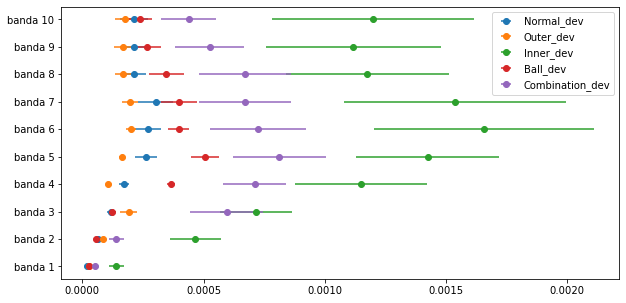

In [55]:
#etiquetas eje y
titulosy=['banda 1']
for i in range(2,nb+1):
    titulosy.append('banda ' + str(i))

plt.rcParams["figure.figsize"] = (10,5)       
plt.figure()        
plt.errorbar(En_dev.mean(axis=0), np.arange(nb),xerr=En_dev.std(axis=0) , fmt='o')
plt.errorbar(Eo_dev.mean(axis=0), np.arange(nb),xerr=Eo_dev.std(axis=0) , fmt='o')
plt.errorbar(Ei_dev.mean(axis=0), np.arange(nb),xerr=Ei_dev.std(axis=0) , fmt='o')
plt.errorbar(Eb_dev.mean(axis=0), np.arange(nb),xerr=Eb_dev.std(axis=0) , fmt='o')
plt.errorbar(Ec_dev.mean(axis=0), np.arange(nb),xerr=Ec_dev.std(axis=0) , fmt='o')
plt.yticks(np.arange(nb),titulosy)
plt.legend(('Normal_dev','Outer_dev','Inner_dev','Ball_dev','Combination_dev'))
plt.show() 

### Señal integrada

In [57]:
Fmax=4000 #frecuencia máxima -> debe ser menor o igual a Fs/2
L=5000 #largo de los segmentos
l=1000 #overlap
nb=10 #numero de bandas

dt=1/Fs #paso de tiempo
df=Fs/L
Nf=int(Fmax/df) #numero de líneas en los espectros
N=len(Normal_int) #numero de datos
Nt=math.floor((N-l)/(L-l)) #total de segmentos

En_int=np.zeros((Nt,nb))
Eo_int=np.zeros((Nt,nb))
Ei_int=np.zeros((Nt,nb))
Eb_int=np.zeros((Nt,nb))
Ec_int=np.zeros((Nt,nb))

for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Fn_int = fft(Normal_int[inicio:fin])[0:Nf]/(L/2)
    Fo_int = fft(Outer_int[inicio:fin])[0:Nf]/(L/2)
    Fi_int = fft(Inner_int[inicio:fin])[0:Nf]/(L/2)
    Fb_int = fft(Ball_int[inicio:fin])[0:Nf]/(L/2)
    Fc_int = fft(Combination_int[inicio:fin])[0:Nf]/(L/2)
    
    Lb=int(Nf/nb)
    for k in range(1,nb+1):
        inicio=Lb*(k-1)+1
        fin=k*Lb
        En_int[i-1][k-1]=np.mean(abs(Fn_int[inicio:fin]))
        Eo_int[i-1][k-1]=np.mean(abs(Fo_int[inicio:fin]))
        Ei_int[i-1][k-1]=np.mean(abs(Fi_int[inicio:fin]))
        Eb_int[i-1][k-1]=np.mean(abs(Fb_int[inicio:fin]))
        Ec_int[i-1][k-1]=np.mean(abs(Fc_int[inicio:fin]))

Text(0.5, 1.0, 'Banda 8')

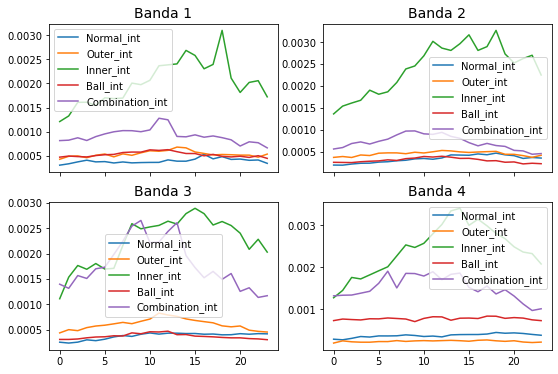

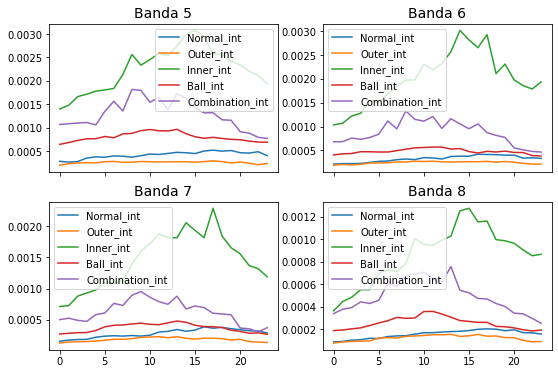

In [58]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))

ax1.plot(En_int[:,0])
ax1.plot(Eo_int[:,0])
ax1.plot(Ei_int[:,0])
ax1.plot(Eb_int[:,0])
ax1.plot(Ec_int[:,0])
ax1.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax1.set_title('Banda 1', fontsize=14)

ax2.plot(En_int[:,1])
ax2.plot(Eo_int[:,1])
ax2.plot(Ei_int[:,1])
ax2.plot(Eb_int[:,1])
ax2.plot(Ec_int[:,1])
ax2.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax2.set_title('Banda 2', fontsize=14)

ax3.plot(En_int[:,2])
ax3.plot(Eo_int[:,2])
ax3.plot(Ei_int[:,2])
ax3.plot(Eb_int[:,2])
ax3.plot(Ec_int[:,2])
ax3.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax3.set_title('Banda 3', fontsize=14)

ax4.plot(En_int[:,3])
ax4.plot(Eo_int[:,3])
ax4.plot(Ei_int[:,3])
ax4.plot(Eb_int[:,3])
ax4.plot(Ec_int[:,3])
ax4.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax4.set_title('Banda 4', fontsize=14)

f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(En_int[:,4])
ax5.plot(Eo_int[:,4])
ax5.plot(Ei_int[:,4])
ax5.plot(Eb_int[:,4])
ax5.plot(Ec_int[:,4])
ax5.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax5.set_title('Banda 5', fontsize=14)

ax6.plot(En_int[:,5])
ax6.plot(Eo_int[:,5])
ax6.plot(Ei_int[:,5])
ax6.plot(Eb_int[:,5])
ax6.plot(Ec_int[:,5])
ax6.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax6.set_title('Banda 6', fontsize=14)

ax7.plot(En_int[:,6])
ax7.plot(Eo_int[:,6])
ax7.plot(Ei_int[:,6])
ax7.plot(Eb_int[:,6])
ax7.plot(Ec_int[:,6])
ax7.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax7.set_title('Banda 7', fontsize=14)

ax8.plot(En_int[:,7])
ax8.plot(Eo_int[:,7])
ax8.plot(Ei_int[:,7])
ax8.plot(Eb_int[:,7])
ax8.plot(Ec_int[:,7])
ax8.legend(['Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'])
ax8.set_title('Banda 8', fontsize=14)

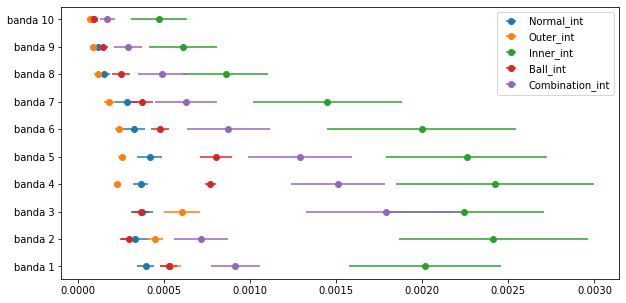

In [59]:
#etiquetas eje y
titulosy=['banda 1']
for i in range(2,nb+1):
    titulosy.append('banda ' + str(i))

plt.rcParams["figure.figsize"] = (10,5)       
plt.figure()        
plt.errorbar(En_int.mean(axis=0), np.arange(nb),xerr=En_int.std(axis=0) , fmt='o')
plt.errorbar(Eo_int.mean(axis=0), np.arange(nb),xerr=Eo_int.std(axis=0) , fmt='o')
plt.errorbar(Ei_int.mean(axis=0), np.arange(nb),xerr=Ei_int.std(axis=0) , fmt='o')
plt.errorbar(Eb_int.mean(axis=0), np.arange(nb),xerr=Eb_int.std(axis=0) , fmt='o')
plt.errorbar(Ec_int.mean(axis=0), np.arange(nb),xerr=Ec_int.std(axis=0) , fmt='o')
plt.yticks(np.arange(nb),titulosy)
plt.legend(('Normal_int','Outer_int','Inner_int','Ball_int','Combination_int'))
plt.show() 

#### Comentarios

**A partir de la extracción de carácteristicas de la señal original, derivada e integral se observa que las features que contribuyen a la detección de la falla son:**

* Señal original: Curtosis y Factor de Cresta.
* Señal derivada: La separación del caso normal se logra separar más aun con Curtosis y Factor de Cresta.
* Señal integrada: Curtosis y Factor de Cresta destacan, pero no hay una mejora respecto de la señal original.

# Metodos tiempo-frecuencia

### Espectrograma

C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_16248/4091420991.py:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, S1,cmap='binary')


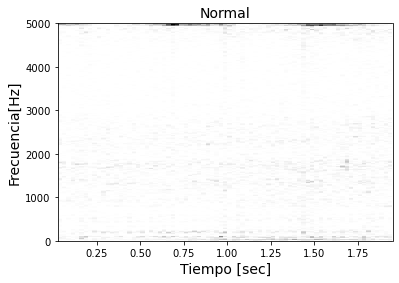

C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_16248/4091420991.py:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, S2,cmap='binary')


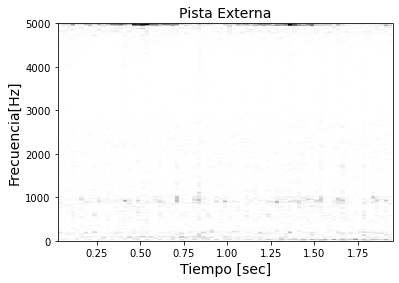

C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_16248/4091420991.py:27: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f, S3,cmap='binary')


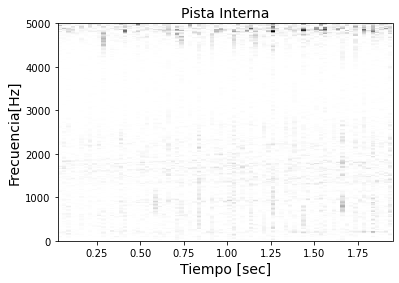

In [36]:
Nd=20000

x1=Normal[1:Nd]
f, t, S1 = signal.spectrogram(x1,Fs,window='hann',nperseg=500,noverlap=250)

x2=Outer[1:Nd]
f, t, S2 = signal.spectrogram(x2,Fs,window='hann',nperseg=500,noverlap=250)

x3=Inner[1:Nd]
f, t, S3 = signal.spectrogram(x3,Fs,window='hann',nperseg=500,noverlap=250)

plt.figure()
plt.pcolormesh(t, f, S1,cmap='binary')
plt.ylabel('Frecuencia[Hz]', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Normal', fontsize=14)
plt.show()

plt.figure()
plt.pcolormesh(t, f, S2,cmap='binary')
plt.ylabel('Frecuencia[Hz]', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Pista Externa', fontsize=14)
plt.show()

plt.figure()
plt.pcolormesh(t, f, S3,cmap='binary')
plt.ylabel('Frecuencia[Hz]', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Pista Interna', fontsize=14)
plt.show()


### Wavelet

In [44]:
dt=1/Fs
Nd=20000

scales=np.arange(1, 50)

x1=Normal[1:Nd]
x2=Outer[1:Nd]
x3=Inner[1:Nd]
t = np.linspace(0, (Nd-1)*dt, Nd)  # Intervalo de tiempo en segundos


C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_16248/1898023234.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,scales,cwt1,cmap='binary')


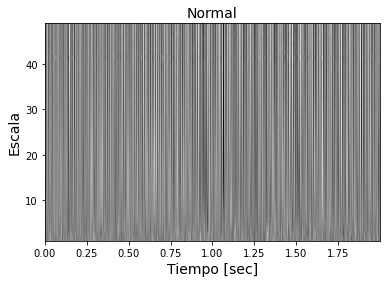

C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_16248/1898023234.py:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,scales,cwt2,cmap='binary')


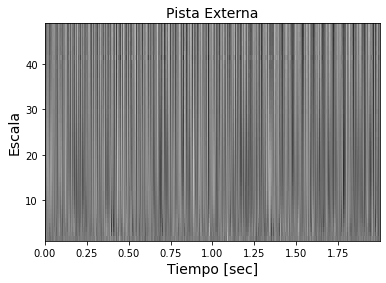

C:\Users\JOSELU~1\AppData\Local\Temp/ipykernel_16248/1898023234.py:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t,scales,cwt3,cmap='binary')


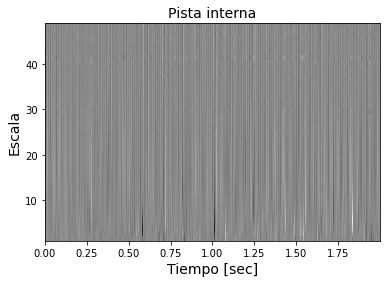

In [45]:
wavlist = pywt.wavelist(kind='continuous')

cwt1,frec1 = pywt.cwt(x1,scales,'gaus1')
cwt2,frec2 = pywt.cwt(x2,scales,'gaus1')
cwt3,frec3 = pywt.cwt(x3,scales,'gaus1')

plt.figure()
plt.pcolormesh(t,scales,cwt1,cmap='binary')
plt.ylabel('Escala', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Normal', fontsize=14)
plt.show()

plt.figure()
plt.pcolormesh(t,scales,cwt2,cmap='binary')
plt.ylabel('Escala', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Pista Externa', fontsize=14)
plt.show()

plt.figure()
plt.pcolormesh(t,scales,cwt3,cmap='binary')
plt.ylabel('Escala', fontsize=14)
plt.xlabel('Tiempo [sec]', fontsize=14)
plt.title('Pista interna', fontsize=14)
plt.show()


# Conclusiones

Concluir mejores metodos, hacer alguna especie de ranking...